<a href="https://colab.research.google.com/github/santiagoec/CM0891-Aprendizaje-Automatico/blob/master/02_Aprendizaje_Supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje Supervisado en Python

Este libro contiene un estudio de **Aprendizaje Supervisado** utilizando Python. Esto hace parte del curso de Aprendizaje Automático de la Maestría de Ciencia de Datos.

Los integrantes de este trabajo:

* Santiago Echeverri Calderon
* Edgar Leandro Jimenez Jaimes

Vamos a instalar las librerias necesarias para la ejecución de este libro

In [0]:
#!pip install featuretools
#! pip install category_encoders

Realizamos la importación de las librerias a utilizar

In [0]:
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import train_test_split,cross_validate
#from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from collections import Counter

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import plot_roc_curve
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')


Realizamos la carga del data set a utilizar:

El conjunto de datos a utilizar es mushrooms, el cual es incluye descripciones de muestras hipotéticas correspondientes a 23 especies de hongos branquiales de la familia Agaricus y Lepiota (pp. 500-525). Cada especie se identifica como definitivamente comestible, definitivamente venenosa o de comestibilidad desconocida y no se recomienda. Esta última clase se combinó con la venenosa. La Guía establece claramente que no existe una regla simple para determinar la comestibilidad de un hongo; ninguna regla como `` folletos tres, déjalo ser '' para el roble venenoso y la hiedra.

Fuente: https://archive.ics.uci.edu/ml/datasets/Mushroom

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv('/content/drive/My Drive/CM0891-Aprendizaje-Automatico/Datasets/mushrooms.csv')

# Exploracion inicial del conjunto de datos

Realizamos una pequeña revision de los datos que acabamos de importar

In [5]:
df.head(5)                # Imprimimos los primeros 5 registros del dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [6]:
df.shape

(8124, 23)

In [7]:
print(df.columns.values)  # Observamos el nombre de las columnas que contiene  el dataset

['class' 'cap-shape' 'cap-surface' 'cap-color' 'bruises' 'odor'
 'gill-attachment' 'gill-spacing' 'gill-size' 'gill-color' 'stalk-shape'
 'stalk-root' 'stalk-surface-above-ring' 'stalk-surface-below-ring'
 'stalk-color-above-ring' 'stalk-color-below-ring' 'veil-type'
 'veil-color' 'ring-number' 'ring-type' 'spore-print-color' 'population'
 'habitat']


In [8]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## Preprocesamiento de datos

In [0]:
# Retiramos veil-type ya que no aporta informacion al ser un unico valor "p" durante todo el dataset

df = df.drop("veil-type",1)

In [10]:
df.info()                 # Revisamos el tipo de datos por cada columna   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-color                  8124 non-null object
ring-number                 8124 non-null object
ring-type  

Sabemos que el dataset contiene en sus datos faltantes el signo '?'. Por lo cual vamos a proceder a transformarlo a NaN para su tratamiento

In [11]:
df = df.replace ({'?': np.NaN}) 
print (df.isna (). sum ())

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64


In [0]:
# Reemplazamos los NaN de stalk root por una categoria "m", dado que solo hay valores faltantes aquí
df['stalk-root'] = df['stalk-root'].replace(np.NaN,'m')

## Generación de arrays X y Y para modelación

In [0]:
X = df.drop(columns='class')                               # Eliminamos la columna clase que es nuestra target 
y = df['class'].replace({'p':0, 'e':1})                    # Extraemos la clase o target 

In [0]:
#X = df.drop(columns='class')                               # Eliminamos la columna clase que es nuestra target 
#X = ce.OneHotEncoder(use_cat_names=True).fit_transform(X)  # Aplicamos en onehotencoding

Vamos a realizar un LabelEncoding para las variables categoricas. Este genera un numero entero para cada categoria de la columna. 

Nota: Revisamos en las discusiones acerca de utilizar el LabelEnconding y el OneHotEnconding y se trabajará con el Label ya que estamos realizando una tarea de clasificación y uno de los algoritmos que utilizaremos serán los arboles de clasificación, el cual segun algunas discusiones que revisamos no es conveniente utilizar el OneHot. Sin embargo al final de este libro haremos una prueba con el mejor modelo utilizando las descriptoras X pasandolas por el OneHot.

Discusión sobre OneHotEncoding en Arboles de clasificación:
https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/

In [15]:
# Realizamos el LabelEnconder para las descriptras X
labelencoder=LabelEncoder()                                 # Instanciamos el LabelEnconder  

for col in X.columns:
    X[col] = labelencoder.fit_transform(X[col])
 
X.head(3)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,2,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,1,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,1,2,2,7,7,2,1,4,3,2,3


In [0]:
# Realizamos un proceso de estandarización de los datos

colnames = X.columns.values
scaler = StandardScaler()                  # Utilizamos StandarScaler 
X = scaler.fit_transform(X)                # Ejecutamos el escalado
X = pd.DataFrame(X)                        # Convertimos a dataframe
X.columns = colnames                       # Nombre de columnas 

In [17]:
X.head(3)                                  # Revisamos como quedan los datos con los primeros 3 registros 

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,0.466971,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,-0.256460,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,-0.256460,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149


In [18]:
print(sorted(Counter(y).items())) # Observamos cuantos datos tenemos por cada clase

[(0, 3916), (1, 4208)]


In [19]:
# En porcentaje
df['class'].value_counts(normalize=True)

e    0.517971
p    0.482029
Name: class, dtype: float64

Es decir que modelo base tendrá un desempeño de 51,79%, es decir, no hacer "nada" es tener ese desempeño de modelo. Por lo cual esperamos que al utilizar modelos matematicos y estadisticos podamos mejorar el desempeño

Vamos a realizar la partición de datos para entrenar modelos


In [0]:
# particion de datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,stratify=y)

In [0]:
# Partición de train
X_train, X_val1, y_train, y_val1 = train_test_split(X,y,
                                                    stratify=y, 
                                                    test_size=0.40,  random_state = 42)

# Partición validación y test
X_val, X_test, y_val, y_test = train_test_split(X_val1, y_val1,
                                                    stratify=y_val1, 
                                                    test_size=0.4,  random_state = 42)													

Ahora vamos a realizar la modelación de datos. Para esto vamos a realizar tres modelos de clasificación supervisada:

1. Regresión Logistica + Regularización
2. Maquinas de soporte vectorial
3. Random Forest

# Modelo 1. Regresión Logistica + Regularización

In [22]:
logre =LogisticRegression()                            # Instanciamos el modelo 
logre.fit(X_train,y_train)                             # Ajustamos los datos de entrenamiento


# Desempeño en accuracy entrenamiento
print('El desempeño de la regresión logistica en train es de', accuracy_score(y_train, logre.predict(X_train)))

# Desempeño en val
print('El desempeño de la regresion logistica  en validacion es de', accuracy_score(y_val, logre.predict(X_val)))

# Desempeño en accuracy test
print('El desempeño de la regresión logistica en test es de', accuracy_score(y_test, logre.predict(X_test) ))

El desempeño de la regresión logistica en train es de 0.9645055395978662
El desempeño de la regresion logistica  en validacion es de 0.9615384615384616
El desempeño de la regresión logistica en test es de 0.9546153846153846


In [23]:
# Observemos algunas metricas mas adecuadas para clasificacion binaria
print(classification_report(y_val, logre.predict(X_val)))             # Revisamos metricas

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       940
           1       0.96      0.97      0.96      1010

    accuracy                           0.96      1950
   macro avg       0.96      0.96      0.96      1950
weighted avg       0.96      0.96      0.96      1950



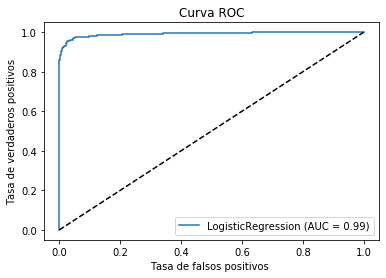

In [24]:
# Graficamos curva ROC
plot_roc_curve(logre, X_val, y_val)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de falsos positivos ')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

Ahora vamos a realizar una optimización y ajuste de los hiperparametros de la regresión logistica mediante el la función `GridSearchCV`

In [0]:
# Vamos a realizar procesos de busqueda de parametros optimos para la regresión
# Esto con el fin de buscar mejor rendimiento y evitar sobreajuste en los datos con la regularizacion

parameters={"C":np.logspace(-3,3,7), 
            "penalty":["l1","l2"]}   # Configuramos parametros de busqueda

logre_2=GridSearchCV(logre,
                     parameters,
                     cv=5,
                     scoring = 'accuracy')

In [26]:
logre_2.fit(X_train,y_train)  

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [27]:
print('El desempeño de la regresión logistica en test luego de regularizar  es de', accuracy_score(y_test, logre_2.predict(X_test)))

El desempeño de la regresión logistica en test luego de regularizar  es de 0.963076923076923


In [28]:
# Observemos algunas metricas mas adecuadas para clasificacion binaria
print(classification_report(y_test, logre_2.predict(X_test)))             # Revisamos metricas

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       627
           1       0.96      0.97      0.96       673

    accuracy                           0.96      1300
   macro avg       0.96      0.96      0.96      1300
weighted avg       0.96      0.96      0.96      1300



# Modelo 2. Maquinas de soporte vectorial

In [29]:
sv=SVC()

sv.fit(X_train, y_train)                                    # Entrenamos el modelo

# Desempeño en accuracy entrenamiento
print('El desempeño del SVM  en train es de', accuracy_score(y_train, sv.predict(X_train)))

# Desempeño en val
print('El desempeño del SVM  en validacion es de', accuracy_score(y_val, sv.predict(X_val)))

# Desempeño en test 
print('El desempeño del SVM en test es de', accuracy_score(y_test, sv.predict(X_test)))

El desempeño del SVM  en train es de 1.0
El desempeño del SVM  en validacion es de 0.9984615384615385
El desempeño del SVM en test es de 0.9992307692307693


In [30]:
# Observemos algunas metricas mas adecuadas para clasificacion binaria
print(classification_report(y_val, sv.predict(X_val)))             # Revisamos metricas

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       940
           1       1.00      1.00      1.00      1010

    accuracy                           1.00      1950
   macro avg       1.00      1.00      1.00      1950
weighted avg       1.00      1.00      1.00      1950



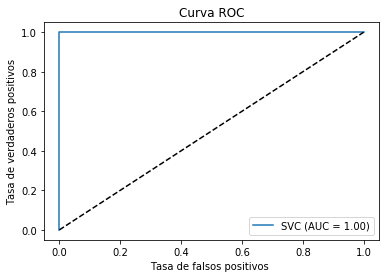

In [31]:
# Graficamos curva ROC
plot_roc_curve(sv, X_val, y_val)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de falsos positivos ')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

In [0]:
# Vamos a realizar procesos de busqueda de parametros optimos para la regresión
# Esto con el fin de buscar mejor rendimiento y evitar sobreajuste en los datos con la regularizacion

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                      'C':[1, 10, 20, 30]},
                      {'kernel': ['linear'], 'C':[1, 10, 20, 30]}]

sv_2=GridSearchCV(sv,
                     tuned_parameters,
                     cv=5,
                     scoring = 'accuracy')

In [33]:
sv_2.fit(X_train, y_train) 

# Desempeño en accuracy entrenamiento
print('El desempeño del arbol en train es de', accuracy_score(y_train, sv_2.predict(X_train)))

# Desempeño en val
print('El desempeño del arbol en validacion es de', accuracy_score(y_val, sv_2.predict(X_val)))

# Desempeño en test 
print('El desempeño del arbol en test es de', accuracy_score(y_test, sv_2.predict(X_test)))

El desempeño del arbol en train es de 0.9792778005744768
El desempeño del arbol en validacion es de 0.977948717948718
El desempeño del arbol en test es de 0.9738461538461538


In [34]:
# Observemos algunas metricas mas adecuadas para clasificacion binaria
print(classification_report(y_val, sv_2.predict(X_val)))             # Revisamos metricas

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       940
           1       0.99      0.97      0.98      1010

    accuracy                           0.98      1950
   macro avg       0.98      0.98      0.98      1950
weighted avg       0.98      0.98      0.98      1950



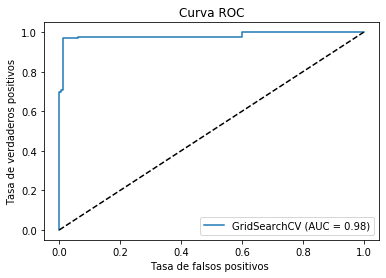

In [35]:
# Graficamos curva ROC
plot_roc_curve(sv_2, X_val, y_val)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de falsos positivos ')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

# Modelo 3. Random Forest

In [36]:
random_forest = RandomForestClassifier(n_estimators=100, max_depth=5) # Instanciamos el modelo con 100 arboles y 5 de profundidad

random_forest.fit(X_train, y_train)                                    # Entrenamos el modelo

# Desempeño en accuracy entrenamiento
print('El desempeño del random en train es de', accuracy_score(y_train, random_forest.predict(X_train)))

# Desempeño en val
print('El desempeño del random en validacion es de', accuracy_score(y_val, random_forest.predict(X_val)))

# Desempeño en test 
print('El desempeño del random en test es de', accuracy_score(y_test, random_forest.predict(X_test)))

El desempeño del random en train es de 0.991177677472302
El desempeño del random en validacion es de 0.9917948717948718
El desempeño del random en test es de 0.9946153846153846


In [37]:
# Observemos algunas metricas mas adecuadas para clasificacion binaria
print(classification_report(y_val, random_forest.predict(X_val)))             # Revisamos metricas

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       940
           1       0.98      1.00      0.99      1010

    accuracy                           0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950



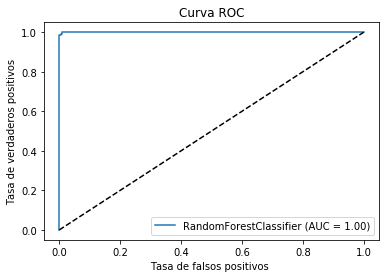

In [38]:
# Graficamos curva ROC
plot_roc_curve(random_forest, X_val, y_val)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de falsos positivos ')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()
plt.show()

Observamos que el RandomForest claramente logra capturar el patron de los datos al utilizar los parametros:

* `n_estimator = 100`
* `max_depth = 5`

Para evitar caer en un sobre ajuste, vamos a realizar un `GridSearch` buscando hipermarametros optimos y ajustando aquellos que pudieren llevar a tener un overtting.

Como primer paso, vamos a explorar el desempeño de los arboles utilizando un k-cross fold validation

In [39]:
cv = cross_validate(estimator = random_forest, 
                    X = X_train, y = y_train, 
                    scoring='accuracy', n_jobs=-1, cv=10, 
                    verbose=10, 
                    return_train_score=True)
cv

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.9s finished


{'fit_time': array([0.37180614, 0.36950111, 0.37902379, 0.37536955, 0.38482499,
        0.37861586, 0.38091683, 0.36932802, 0.37263823, 0.36909986]),
 'score_time': array([0.02023196, 0.02053857, 0.01972866, 0.02019286, 0.01967788,
        0.01965833, 0.02014422, 0.02035379, 0.01994467, 0.02024794]),
 'test_score': array([0.98770492, 0.98565574, 0.99385246, 0.99180328, 0.99178645,
        0.99794661, 0.99794661, 0.99794661, 0.97946612, 0.98151951]),
 'train_score': array([0.98974008, 0.99133607, 0.99088007, 0.99156407, 0.99156599,
        0.99156599, 0.99179394, 0.99088215, 0.9911101 , 0.99133804])}

Ahora si establecemos los valores de los hiperparametros de busqueda del RandomForest

In [0]:
param_grid = {'n_estimators': [150,250,300],    # Aumentamos el numero de estimadores
              'max_features': ['sqrt', 'log2'], # Intetamos reducir el numero de features a traves de estas funciones  
              'max_depth':[5,8,10],
              'criterion':['gini', 'entropy']}

model_rf = GridSearchCV(estimator=random_forest, 
                        param_grid=param_grid, cv= 5, scoring = 'accuracy',
                        n_jobs=-1)

In [41]:
model_rf.fit(X_train, y_train)                  # Ajustamos y optimzamos hiperparametros con el conjunto de train 

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

Vamos a realizar una regularización y un tunning de los hiperparametros

In [42]:
model_rf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
# Desempeño en accuracy entrenamiento
print('El desempeño del random en train es de', accuracy_score(y_train, model_rf.predict(X_train)))

# Desempeño en val
print('El desempeño del random en validacion es de', accuracy_score(y_val, model_rf.predict(X_val)))

# Desempeño en test 
print('El desempeño del random en test es de', accuracy_score(y_test, model_rf.predict(X_test)))

El desempeño del random en train es de 1.0
El desempeño del random en validacion es de 1.0
El desempeño del random en test es de 1.0


In [44]:
# Observemos algunas metricas mas adecuadas para clasificacion binaria
print(classification_report(y_test, model_rf.predict(X_test)))             # Revisamos metricas

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       627
           1       1.00      1.00      1.00       673

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300



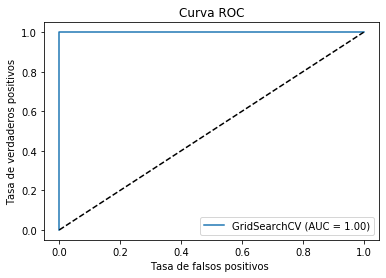

In [45]:
# Graficamos curva ROC
plot_roc_curve(model_rf, X_test, y_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de falsos positivos ')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()
plt.show()